In [1]:

import requests 
from bs4 import BeautifulSoup
url='https://quotes.toscrape.com/js/'
response=requests.get(url)


print(response.status_code)
print(response.text[:1000])

200
<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    
<script src="/static/jquery.js"></script>
<script>
    var data = [
    {
        "tags": [
            "change",
            "deep-thoughts",
            "thinking",
            "world"
        ],
        "author": {
            "name": "Albert Einstein",
            "goodreads_link": "/author/show/9810.Albert_Einstei

In [16]:
# Task 1

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://quotes.toscrape.com/js/page/2/')

from selenium.webdriver.common.by import By

data=[]
for page in range(5):   
    time.sleep(3)

    quotes = driver.find_elements(By.CLASS_NAME, "quote")
    for q in quotes:
        text=q.find_element(By.CLASS_NAME,'text').text
        author=q.find_element(By.CLASS_NAME,'author').text
        tags=q.find_element(By.CLASS_NAME,'tags').text
        
        data.append([text,author,tags])

    try:
        btn=driver.find_element(By.CSS_SELECTOR,'li.next a')
        btn.click()

    except:
        break

driver.quit() 

df=pd.DataFrame(data,columns=['quote','author','tags'])

df.to_csv("data_raw.csv", index=False)

print("Raw dataset saved")

Raw dataset saved


In [19]:
# Task 2
# cleaning.py

import pandas as pd
df=pd.read_csv(r"C:\Users\risla\data_raw.csv")

print(df.head())
print(df.shape)


                                               quote           author  \
0  “This life is what you make it. No matter what...   Marilyn Monroe   
1  “It takes a great deal of bravery to stand up ...     J.K. Rowling   
2  “If you can't explain it to a six year old, yo...  Albert Einstein   
3  “You may not be her first, her last, or her on...       Bob Marley   
4  “I like nonsense, it wakes up the brain cells....        Dr. Seuss   

                                                tags  
0  Tags: friends heartbreak inspirational life lo...  
1                              Tags: courage friends  
2                        Tags: simplicity understand  
3                                         Tags: love  
4                                      Tags: fantasy  
(50, 3)


In [21]:
df.isnull().sum()

quote     0
author    0
tags      0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","-")

df['tags']=df['tags'].str.replace("Tags:","").str.split().str.join(",")

df.to_csv("cleaned_data.csv",index=False)

In [42]:
# Task 3
# EDA
import pandas as pd
df=pd.read_csv(r"C:\Users\risla\cleaned_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   50 non-null     object
 1   author  50 non-null     object
 2   tags    48 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [79]:
 # Dataset Overview
print("number of quotes:",len(df))
print("number of unique records:",df['author'].nunique())

tag=df['tags']
print('most common tags:', tag.value_counts().head(5))


number of quotes: 50
number of unique records: 31
most common tags: tags
attributed-no-source    3
love                    3
dumbledore              2
music                   2
inspirational           2
Name: count, dtype: int64


In [ ]:
# Author Analysis

print('top 5 authors')
author=df['author'].value_counts().head(5)
author

saved


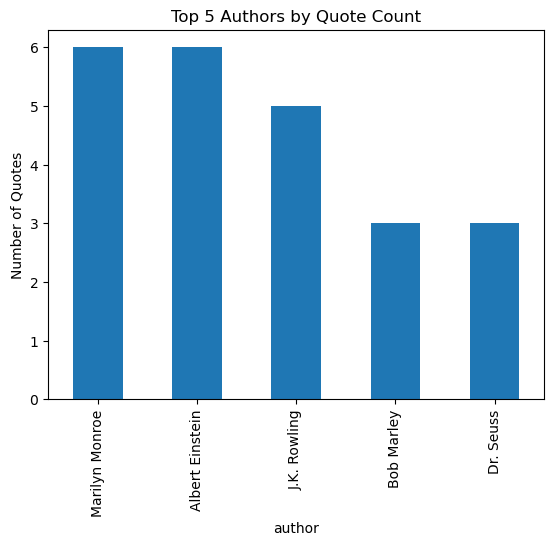

In [57]:
import matplotlib.pyplot as plt
author.plot(kind='bar')
plt.title('Top 5 Authors by Quote Count')
plt.ylabel("Number of Quotes")
plt.savefig("Author Analysis bar chart")

print('saved')

In [59]:
# Tag Analysis
print('Top 10 tags')
res=tag.value_counts().head(10)
res

Top 10 tags


tags
attributed-no-source                       3
love                                       3
dumbledore                                 2
music                                      2
inspirational                              2
chocolate,food,humor                       1
misattributed-to-c-s-lewis,reading         1
knowledge,learning,understanding,wisdom    1
books,library                              1
read,readers,reading,reading-books         1
Name: count, dtype: int64

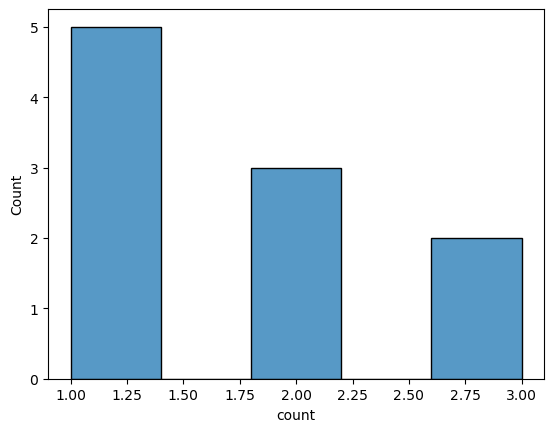

In [62]:
import seaborn as sns
sns.histplot(res)
plt.show()

Text(0, 0.5, 'Frequency')

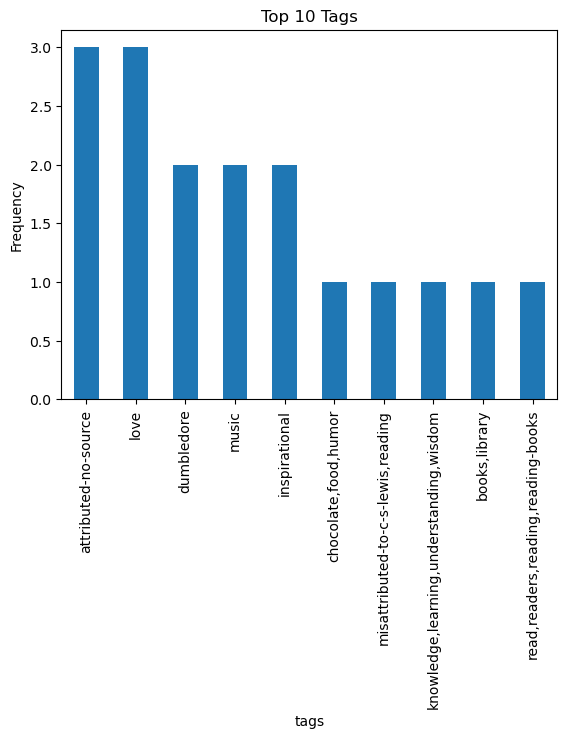

In [64]:
#  Bar chart of top 10
res.plot(kind="bar")
plt.title("Top 10 Tags")
plt.ylabel("Frequency")


In [66]:
# Quote Length Analysis

df['quote_length']=df['quote'].str.len()
df['quote_length'].describe()

count      50.000000
mean      126.720000
std       169.668349
min        34.000000
25%        65.750000
50%        81.000000
75%       121.750000
max      1084.000000
Name: quote_length, dtype: float64

Text(0, 0.5, 'Frequency')

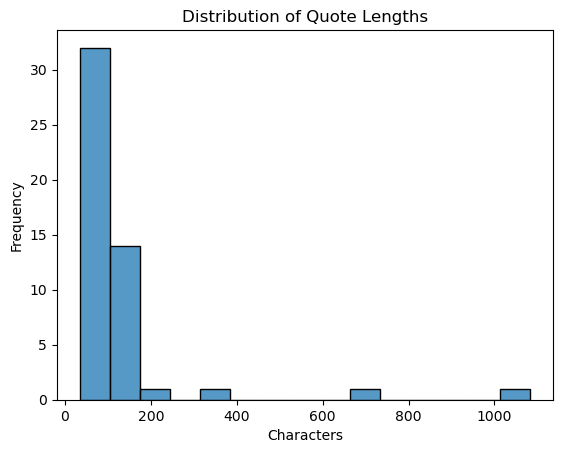

In [70]:
# Distribution plot

sns.histplot(df['quote_length'])
plt.title("Distribution of Quote Lengths")
plt.xlabel("Characters")
plt.ylabel("Frequency")

In [78]:
# Longest & shortest quotes

longest=df.loc[df['quote_length'].idxmax()]
shortest=df.loc[df['quote_length'].idxmin()]

print('longest:',longest['quote'])
print('shortest:',shortest['quote'])

longest: “This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most imp

In [84]:

most_common_author = df["author"].value_counts().idxmax()
most_common_tag = tag.value_counts().idxmax()
longest_author = df.loc[df["quote_length"].idxmax(), "author"]

insight_text = f"""
INSIGHTS

Most frequent author: {most_common_author}

Most common tag/theme: {most_common_tag}

Longer quotes tend to appear from: {longest_author}

Tagging pattern:
Many quotes share motivational and life-related themes.

Business use-case:
This dataset can be used to build a quote recommendation system based on preferred themes (tags).
"""

with open("insights.txt", "w") as file:
    file.write(insight_text)
print(insight_text)


INSIGHTS

Most frequent author: Marilyn Monroe

Most common tag/theme: attributed-no-source

Longer quotes tend to appear from: Marilyn Monroe

Tagging pattern:
Many quotes share motivational and life-related themes.

Business use-case:
This dataset can be used to build a quote recommendation system based on preferred themes (tags).

